# NSL-KDD Network Intrusion Detection Project

## Introduction
Network security is crucial in today's digital landscape, with increasing sophistication and volume of cyber threats. Intrusion detection systems (IDS) help mitigate these threats by monitoring network activity and identifying potential attacks. The **NSL-KDD dataset** is a benchmark dataset widely used for evaluating IDS models.

In this project, we focus on a **multi-class classification** approach. Rather than distinguishing normal from anomalous traffic, we classify network connections into multiple attack categories (or types). Specifically, we aim to:
- **Load** the NSL-KDD dataset and perform **basic exploration**.
- **Perform Exploratory Data Analysis (EDA)**, including statistical analysis and visualizing attack distributions.
- **Conduct Feature Engineering & Feature Selection** by:
   - Encoding categorical variables for machine learning compatibility and analyzing correlations.
   - Applying **Variance Threshold**, **Correlation Analysis**, and **VIF** to remove redundant or low-impact features.
- Balance the dataset using `SMOTE` to improve detection of rare attack types.
- **Train** multiple classification models, including `LogisticRegression` (baseline), `RandomForestClassifier`, and `HistGradientBoostingClassifier`.
- Evaluate model performance using key multi-class metrics such as **Accuracy, Precision, Recall, F1-score**, and **Confusion Matrix**.
- **Summarize** results and suggest potential improvements for future work.


## Import Required Libraries
We start by importing necessary libraries for handling data, visualization, and machine learning.


In [1]:
# data Handling
import pandas as pd # used for data manipulation and analysis
import numpy as np  # supports mathematical operations and array computations

# visualization Libraries
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns           # statistical data visualization

from collections import Counter

# machine Learning Tools
# encodes categorical data and scales numerical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# logistic Regression Model
from sklearn.linear_model import LogisticRegression
# random Forest and Hist Gradient Boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

# model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,         # calculates accuracy for the binary classification problem
    confusion_matrix,       # displays the confusion matrix
    classification_report   # provides precision, recall, F1-score, and support per class
)


In [2]:
%%html
<style>
table {float:left}
</style>


## Data Source & Feature Overview
The **NSL-KDD dataset** is an improved version of the original **KDD99 dataset**. It addresses redundancy and imbalance issues, making it a better benchmark for evaluating intrusion detection models.

This dataset was obtained from Kaggle and is publicly available at [NSL-KDD Dataset on Kaggle](https://www.kaggle.com/datasets/kaggleprollc/nsl-kdd99-dataset)

> **Reference:**  
> Tavallaee, M., Bagheri, E., Lu, W., & Ghorbani, A. A. (2009). *A detailed analysis of the KDD CUP 99 dataset.*  
> Proceedings of the Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA).

### Dataset Information
- **Train Dataset Size:** ~17.88 MB
- **Test Dataset Size:** ~3.21 MB
- **Total Columns:** 43 (41 features + 2 label)
- **Types of Features:**
  - **Categorical**
  - **Numerical**

### Data Source & Feature Overview
| Feature Name                  | Description |
|:------------------------------|:-------------|
| duration                      | Length (in seconds) of the connection |
| protocol_type                 | Type of protocol (TCP, UDP, ICMP) |
| service                       | Network service on the destination (e.g., HTTP, FTP, SMTP) |
| flag                          | Status of the connection (e.g., SF, S0, REJ) |
| src_bytes                     | Bytes sent from source to destination |
| dst_bytes                     | Bytes sent from destination to source |
| land                          | 1 if the connection is to/from the same host/port, otherwise 0 |
| wrong_fragment                | Number of wrong fragments |
| urgent                        | Number of urgent packets |
| hot                           | Number of hot indicators |
| num_failed_logins             | Count of failed login attempts |
| logged_in                     | 1 if successfully logged in, otherwise 0 |
| num_compromised               | Number of compromised conditions |
| root_shell                    | 1 if root shell is obtained, otherwise 0 |
| su_attempted                  | 1 if the 'su root' command is attempted, otherwise 0 |
| num_root                      | Number of root accesses |
| num_file_creations            | Number of file creation operations |
| num_shells                    | Number of shell prompts invoked |
| num_access_files              | Number of access control file operations |
| num_outbound_cmds             | Number of outbound commands |
| is_host_login                 | 1 if the login belongs to the host, otherwise 0 |
| is_guest_login                | 1 if the login is from a guest account, otherwise 0 |
| count                         | Number of connections to the same host as current connection in past 2 seconds |
| srv_count                     | Number of connections to the same service as current connection in past 2 seconds |
| serror_rate                   | Percentage of connections that have SYN errors |
| srv_serror_rate               | Percentage of connections that have SYN errors for the same service |
| rerror_rate                   | Percentage of connections that have REJ errors |
| srv_rerror_rate               | Percentage of connections that have REJ errors for the same service |
| same_srv_rate                 | Percentage of connections to the same service |
| diff_srv_rate                 | Percentage of connections to different services |
| srv_diff_host_rate            | Percentage of connections to different hosts |
| dst_host_count                | Count of destination hosts accessed |
| dst_host_srv_count            | Count of connections to the same service at the destination |
| dst_host_same_srv_rate        | Percentage of connections to the same service at the destination |
| dst_host_diff_srv_rate        | Percentage of connections to different services at the destination |
| dst_host_same_src_port_rate   | Percentage of connections to the same source port |
| dst_host_srv_diff_host_rate   | Percentage of different hosts connected via the same service |
| dst_host_serror_rate          | Percentage of SYN errors at the destination host |
| dst_host_srv_serror_rate      | Percentage of SYN errors for the same service at the destination |
| dst_host_rerror_rate          | Percentage of REJ errors at the destination host |
| dst_host_srv_rerror_rate      | Percentage of REJ errors for the same service at the destination |


## Data Loading and basic exploration
Load the training and testing files (KDDTrain+.txt and KDDTest+.txt).
Print basic info (shape, head, etc.) to understand the data.


In [3]:
# define column names
column_names = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "attack_type",
    "difficulty_level"
]

train_path = "/kaggle/input/nsl-kdd99-dataset/KDDTrain+.txt"
test_path = "/kaggle/input/nsl-kdd99-dataset/KDDTest+.txt"

train_data = pd.read_csv(train_path, names=column_names, header=None)
test_data  = pd.read_csv(test_path,  names=column_names, header=None)

print("Train Data Shape:", train_data.shape)
print("Test Data Shape: ", test_data.shape)

print("\nSample of Train Data:\n")
train_data


Train Data Shape: (125973, 43)
Test Data Shape:  (22544, 43)

Sample of Train Data:



duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                    0.17   
1                    0       0    0  ...                    0.00   
2                    0       0    0  ...                    0.10   
3                    0       0    0  ...                    1.00   
4                    0       0    0  ...                    1.00   
...                ...     ...  ...  ...                     ...   
125968               0       0    0  ...                    0.10   
125969               0       0    0  ...                    0.96   
125970               0       0    0  ...                    0.12   
125971               0       0    0  ...                    0.03   
125972               0       0    0  ...                    0.30   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                         0.03                         0.17   
1                         0.60                         0.88   
2                         0.05                         0.00   
3                         0.00                         0.03   
4                         0.00                         0.00   
...                        ...                          ...   
125968                    0.06                         0.00   
125969                    0.01                         0.01   
125970                    0.06                         0.00   
125971                    0.05                         0.00   
125972                    0.03                         0.30   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  1.00   
3                              0.04                  0.03   
4                              0.00                  0.00   
...                             ...                   ...   
125968                         0.00                  1.00   
125969                         0.00                  0.00   
125970                         0.00                  0.72   
125971                         0.00                  1.00   
125972                         0.00                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                  0.05   
1                           0.00                  0.00   
2                           1.00                  0.00   
3                           0.01                  0.00   
4                           0.00                  0.00   
...                          ...                   ...   
125968                      1.00                  0.00   
125969                      0.00                  0.00   
125970                      0.00                  0.01   
125971                      1.00                  0.00   
125972                      0.00                  0.00   

        dst_host_srv_rerror_rate  attack_type  difficulty_level  
0            

## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) helps us understand the data distribution, relationships, and potential anomalies. By systematically exploring the dataset, we can:
- Identify any missing values
- Discover patterns and correlations among features
- Determine if additional feature engineering is needed


### Basic Statistics & Attack Type Distribution

In [4]:
def print_section(title, length=80):
    separator = "#" * (length)
    print(f"\n{separator}")
    print(title.center(length))
    print(f"{separator}\n")

print_section("Train Data Info")
train_data.info()

print_section("Test Data Info")
test_data.info()

print_section("Attack Type Distribution (Train)")
print(train_data["attack_type"].value_counts())
print(f"Sum of all total attack_type: {train_data['attack_type'].value_counts().sum()}")

print_section("Attack Type Distribution (Test)")
print(test_data["attack_type"].value_counts())
print(f"Sum of all total attack_type: {test_data['attack_type'].value_counts().sum()}")



################################################################################
                                Train Data Info                                 
################################################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int

### Group Attack Types into Higher-Level Categories
Since NSL-KDD contains many individual attack types, we group them into four major attack categories:
- DoS (Denial of Service)
- Probe (Scanning/Reconnaissance)
- R2L (Remote to Local)
- U2R (User to Root Escalation)


In [5]:
# define attack type groups
dos_attacks = [
    "back",
    "land",
    "neptune",
    "pod",
    "smurf",
    "teardrop",
    "apache2",
    "udpstorm",
    "processtable",
    "mailbomb"
]
probe_attacks = [
    "satan",
    "ipsweep",
    "nmap",
    "portsweep",
    "mscan",
    "saint"
]
r2l_attacks = [
    "guess_passwd",
    "ftp_write",
    "imap",
    "phf",
    "multihop",
    "warezmaster",
    "warezclient",
    "spy",
    "xlock",
    "xsnoop",
    "snmpguess",
    "snmpgetattack",
    "httptunnel",
    "sendmail",
    "named"
]
u2r_attacks = [
    "rootkit",
    "buffer_overflow",
    "loadmodule",
    "perl",
    "sqlattack",
    "xterm",
    "ps"
]

# function to categorize attack types
def map_attack_type(attack):
    if attack in dos_attacks:
        return "DoS"
    elif attack in probe_attacks:
        return "Probe"
    elif attack in r2l_attacks:
        return "R2L"
    elif attack in u2r_attacks:
        return "U2R"
    elif attack == "normal":
        return "Normal"
    else:
        return "Other"

# Apply mapping function
train_data["attack_category"] = train_data["attack_type"].apply(map_attack_type)
test_data["attack_category"]  = test_data["attack_type"].apply(map_attack_type)

print_section("Attack Category Distribution (Train)")
print(train_data["attack_category"].value_counts())
print(f"Sum of all total attack_type from attack_category: {train_data['attack_category'].value_counts().sum()}")

print_section("Attack Category Distribution (Test)")
print(test_data["attack_category"].value_counts())
print(f"Sum of all total attack_type from attack_category: {test_data['attack_category'].value_counts().sum()}")



################################################################################
                      Attack Category Distribution (Train)                      
################################################################################

attack_category
Normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64
Sum of all total attack_type from attack_category: 125973

################################################################################
                      Attack Category Distribution (Test)                       
################################################################################

attack_category
Normal    9711
DoS       7458
R2L       2885
Probe     2421
U2R         67
Other        2
Name: count, dtype: int64
Sum of all total attack_type from attack_category: 22544


### Data Visualization (Pie Charts)
Data visualization helps us quickly understand patterns and proportions within the dataset. In this section, we use pie charts to compare how different network features (like protocol type and service) relate to attack vs. normal traffic.

- Attack Distribution by Protocol Type
- Service Distribution for Normal vs. Attack Traffic

In [6]:
def plot_multiple_pie_charts(data, group_by_col, value_col, title_prefix, threshold=0.01):
    """
    Generates pie chart with an "Other" category and better readability.
    
    Parameters:
        data (DataFrame): The dataset to use.
        group_by_col (str): The column to group by (e.g., 'protocol_type', 'attack_status').
        value_col (str): The column to count (e.g., 'attack_category', 'flag', 'service').
        title_prefix (str): A title prefix for each chart.
        threshold (float): The minimum percentage a slice should have to remain separate.
    """
    # get unique values in the grouping column
    unique_groups = data[group_by_col].unique()
    # create subplots dynamically based on the number of unique groups
    fig, axes = plt.subplots(1, len(unique_groups), figsize=(28, 10))
    
    if len(unique_groups) == 1:
        axes = [axes]

    # loop through each unique group and create a pie chart
    for i, group in enumerate(unique_groups):
        subset = data[data[group_by_col] == group]
        counts = subset[value_col].value_counts()
        total = counts.sum()
        
        # separate small values into "Other" category
        mask = counts / total >= threshold
        small_slices = counts[~mask].sum()
        counts = counts[mask]
        if small_slices > 0:
            counts['Other'] = small_slices
        
        # generate explode values dynamically
        explode = [0.1 if (v / total) >= 0.1 else 0.05 for v in counts.values]

        # create a pie chart
        wedges, texts, autotexts = axes[i].pie(
            counts, 
            labels=counts.index, 
            autopct='%1.1f%%',
            startangle=140, 
            explode=explode,  
            colors=plt.get_cmap("tab20").colors,
            shadow=True,
            wedgeprops={'edgecolor': 'black'}
        )
        
        # improve label readability
        for text in texts:
            text.set_fontsize(10)
        for autotext in autotexts:
            autotext.set_fontsize(12)
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        
        # set title for each subplot
        axes[i].set_title(f"{title_prefix} {group}", fontsize=18, fontweight='bold')
        # add a legend for each chart
        axes[i].legend(wedges, counts.index, title=value_col, loc="best", fontsize=12)
    
    plt.tight_layout()
    plt.show()


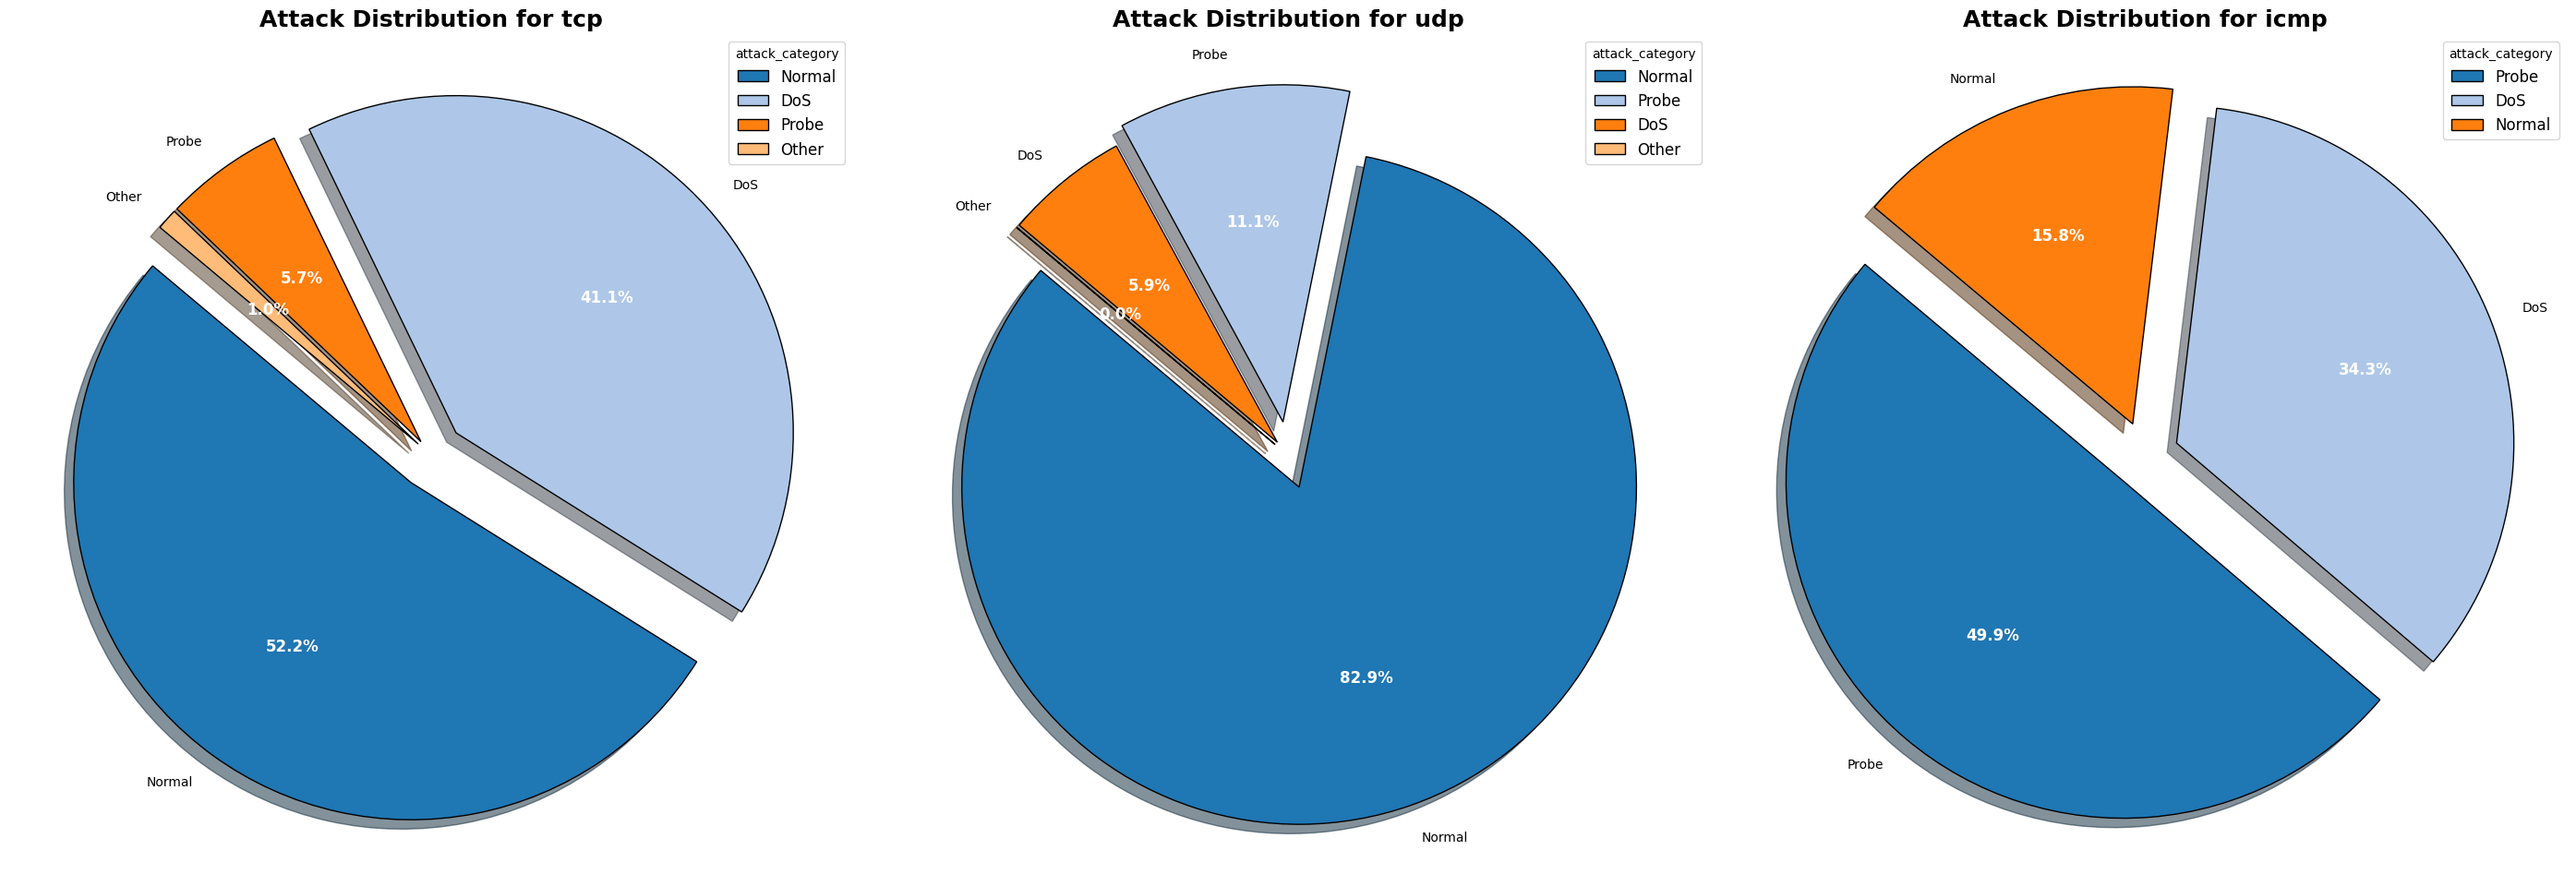

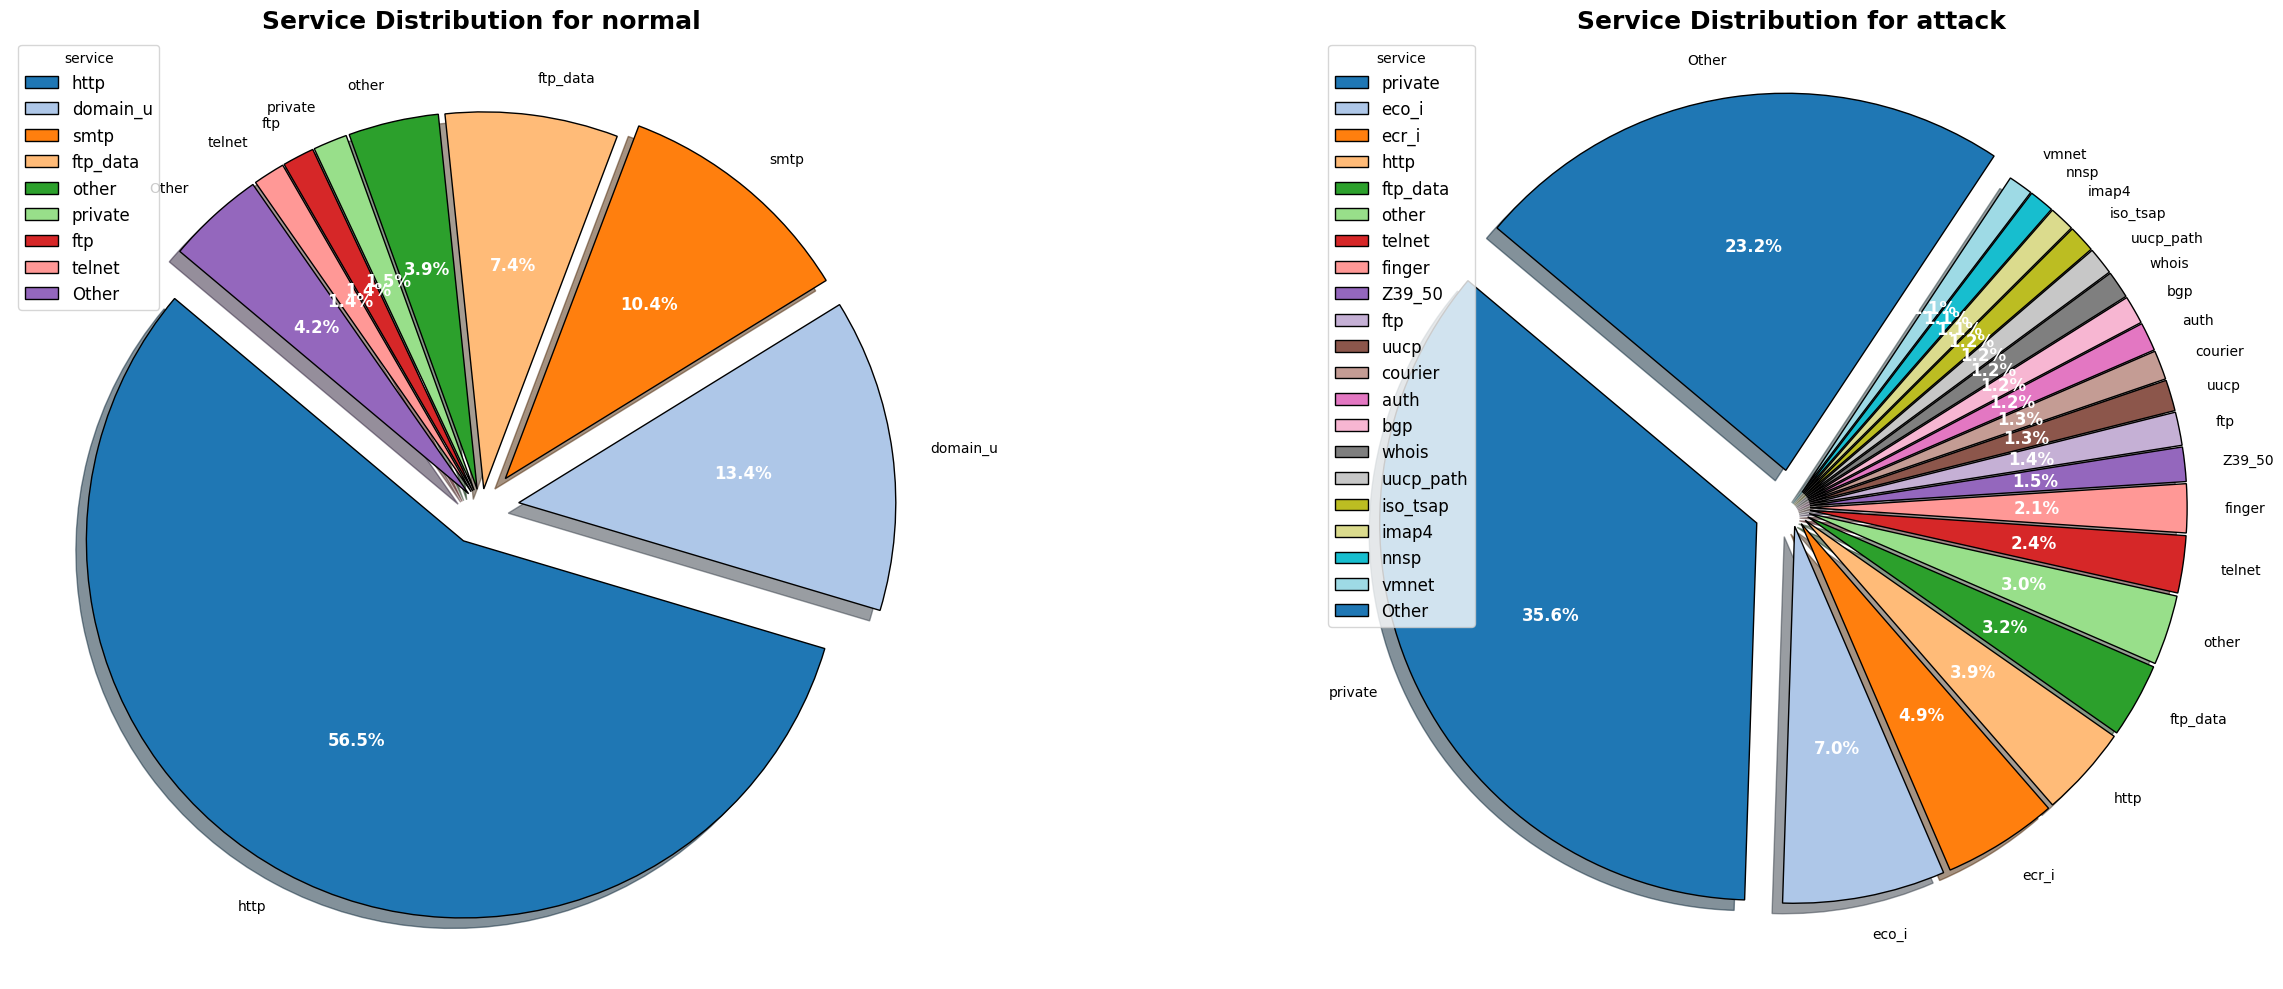

In [7]:
# attack Distribution by Protocol Type
plot_multiple_pie_charts(train_data, "protocol_type", "attack_category", "Attack Distribution for")

# service Distribution for Normal vs. Attack Traffic
train_data["attack_status"] = train_data["attack_category"].apply(
    lambda x: "attack" if x != "Normal" else "normal"
)

plot_multiple_pie_charts(
    train_data,
    "attack_status",
    "service",
    "Service Distribution for"
)


## Feature Engineering & Feature Selection
To optimize model performance, we maintain two versions of the dataset:
- `train_data_full` - Used for Tree-Based Models (Random Forest, Gradient Boosting, XGBoost, etc.), which can handle correlated features naturally.
- `train_data_reduced` - Used for Linear Models (Logistic Regression, SVM, etc.), which require feature selection to avoid multicollinearity.

Some features, like `num_outbound_cmds`, contain only a **single unique value**, meaning they have **zero variance**. Since variance is used in correlation computations, such features can produce **NaN values** in the correlation matrix and should be removed.

To ensure data quality and model stability, we apply the following feature selection steps:

- **Detect & Remove Constant/Near-Constant Features** - Using `VarianceThreshold`.
- **Remove Highly Correlated Features** - Features with a correlation above **0.70**.
- **Compute Variance Inflation Factor (VIF)** - To detect and remove features causing multicollinearity.

This process ensures that our dataset is clean, optimized, and structured for efficient model training.


### Encode Categorical Features
To prepare the dataset for modeling, we convert categorical variables (`protocol_type`, `service`, `flag`) into numerical values using Label Encoding.

In [8]:
categorical_cols = ["protocol_type", "service", "flag"]

# apply Label Encoding to categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

# encode Attack Categories Numerically
attack_category_encoder = LabelEncoder()
attack_category_encoder.fit(pd.concat([train_data["attack_category"], test_data["attack_category"]], axis=0))

train_data["attack_category_encoded"] = attack_category_encoder.transform(train_data["attack_category"])
test_data["attack_category_encoded"]  = attack_category_encoder.transform(test_data["attack_category"])


In [9]:
train_data

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              1       20     9        491          0     0   
1              0              2       44     9        146          0     0   
2              0              1       49     5          0          0     0   
3              0              1       24     9        232       8153     0   
4              0              1       24     9        199        420     0   
...          ...            ...      ...   ...        ...        ...   ...   
125968         0              1       49     5          0          0     0   
125969         8              2       49     9        105        145     0   
125970         0              1       54     9       2231        384     0   
125971         0              1       30     5          0          0     0   
125972         0              1       20     9        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_diff_host_rate  \
0                    0       0    0  ...                         0.00   
1                    0       0    0  ...                         0.00   
2                    0       0    0  ...                         0.00   
3                    0       0    0  ...                         0.04   
4                    0       0    0  ...                         0.00   
...                ...     ...  ...  ...                          ...   
125968               0       0    0  ...                         0.00   
125969               0       0    0  ...                         0.00   
125970               0       0    0  ...                         0.00   
125971               0       0    0  ...                         0.00   
125972               0       0    0  ...                         0.00   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                  0.05   
1                       0.00                      0.00                  0.00   
2                       1.00                      1.00                  0.00   
3                       0.03                      0.01                  0.00   
4                       0.00                      0.00                  0.00   
...                      ...                       ...                   ...   
125968                  1.00                      1.00                  0.00   
125969                  0.00                      0.00                  0.00   
125970                  0.72                      0.00                  0.01   
125971                  1.00                      1.00                  0.00   
125972                  0.00                      0.00                  0.00   

        dst_host_srv_rerror_rate  attack_type  difficulty_level  \
0                           0.00       normal                20   
1                           0.00       normal                15   
2                           0.00      neptune                19   
3                           0.01       normal                21   
4                           0.00       normal                21   
...                          ...          ...               ...   
125968                      0.00      neptune                20   
125969                      0.00       normal                21   
125970                      0.00       normal                18   
125971                      0.00      neptune                20   
125972                      0.00       normal                21   

        attack_category  attack_status  attack_category_encoded  
0                Normal         normal                        1  
1                Normal         normal                        1  
2                   DoS         attack                        0  
3                Normal         normal                        1  
4                Normal         normal                        1  
...                 ...         

In [10]:
test_data

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              1       49     1          0          0     0   
1             0              1       49     1          0          0     0   
2             2              1       20     9      12983          0     0   
3             0              0       14     9         20          0     0   
4             1              1       60     2          0         15     0   
...         ...            ...      ...   ...        ...        ...   ...   
22539         0              1       54     9        794        333     0   
22540         0              1       24     9        317        938     0   
22541         0              1       24     9      54540       8314     0   
22542         0              2       12     9         42         42     0   
22543         0              1       57     1          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_same_src_port_rate  \
0                   0       0    0  ...                         0.00   
1                   0       0    0  ...                         0.00   
2                   0       0    0  ...                         0.61   
3                   0       0    0  ...                         1.00   
4                   0       0    0  ...                         0.03   
...               ...     ...  ...  ...                          ...   
22539               0       0    0  ...                         0.01   
22540               0       0    0  ...                         0.01   
22541               0       0    2  ...                         0.00   
22542               0       0    0  ...                         0.00   
22543               0       0    0  ...                         0.00   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                             0.00                  0.00   
1                             0.00                  0.00   
2                             0.02                  0.00   
3                             0.28                  0.00   
4                             0.02                  0.00   
...                            ...                   ...   
22539                         0.01                  0.01   
22540                         0.01                  0.01   
22541                         0.00                  0.00   
22542                         0.00                  0.00   
22543                         0.00                  0.00   

       dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.0                  1.00   
1                           0.0                  1.00   
2                           0.0                  0.00   
3                           0.0                  0.00   
4                           0.0                  0.83   
...                         ...                   ...   
22539                       0.0                  0.00   
22540                       0.0                  0.00   
22541                       0.0                  0.07   
22542                       0.0                  0.00   
22543                       0.0                  0.44   

       dst_host_srv_rerror_rate  attack_type  difficulty_level  \
0                          1.00      neptune                21   
1                          1.00      neptune                21   
2                          0.00       normal                21   
3                          0.00        saint                15   
4                          0.71        mscan                11   
...                         ...          ...               ...   
22539                      0.00       normal                21   
22540                      0.00       normal                21   
22541                      0.07         back                15   
22542                      0.00       normal                21   
22543                      1.00        mscan                14   

       attack_cate

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


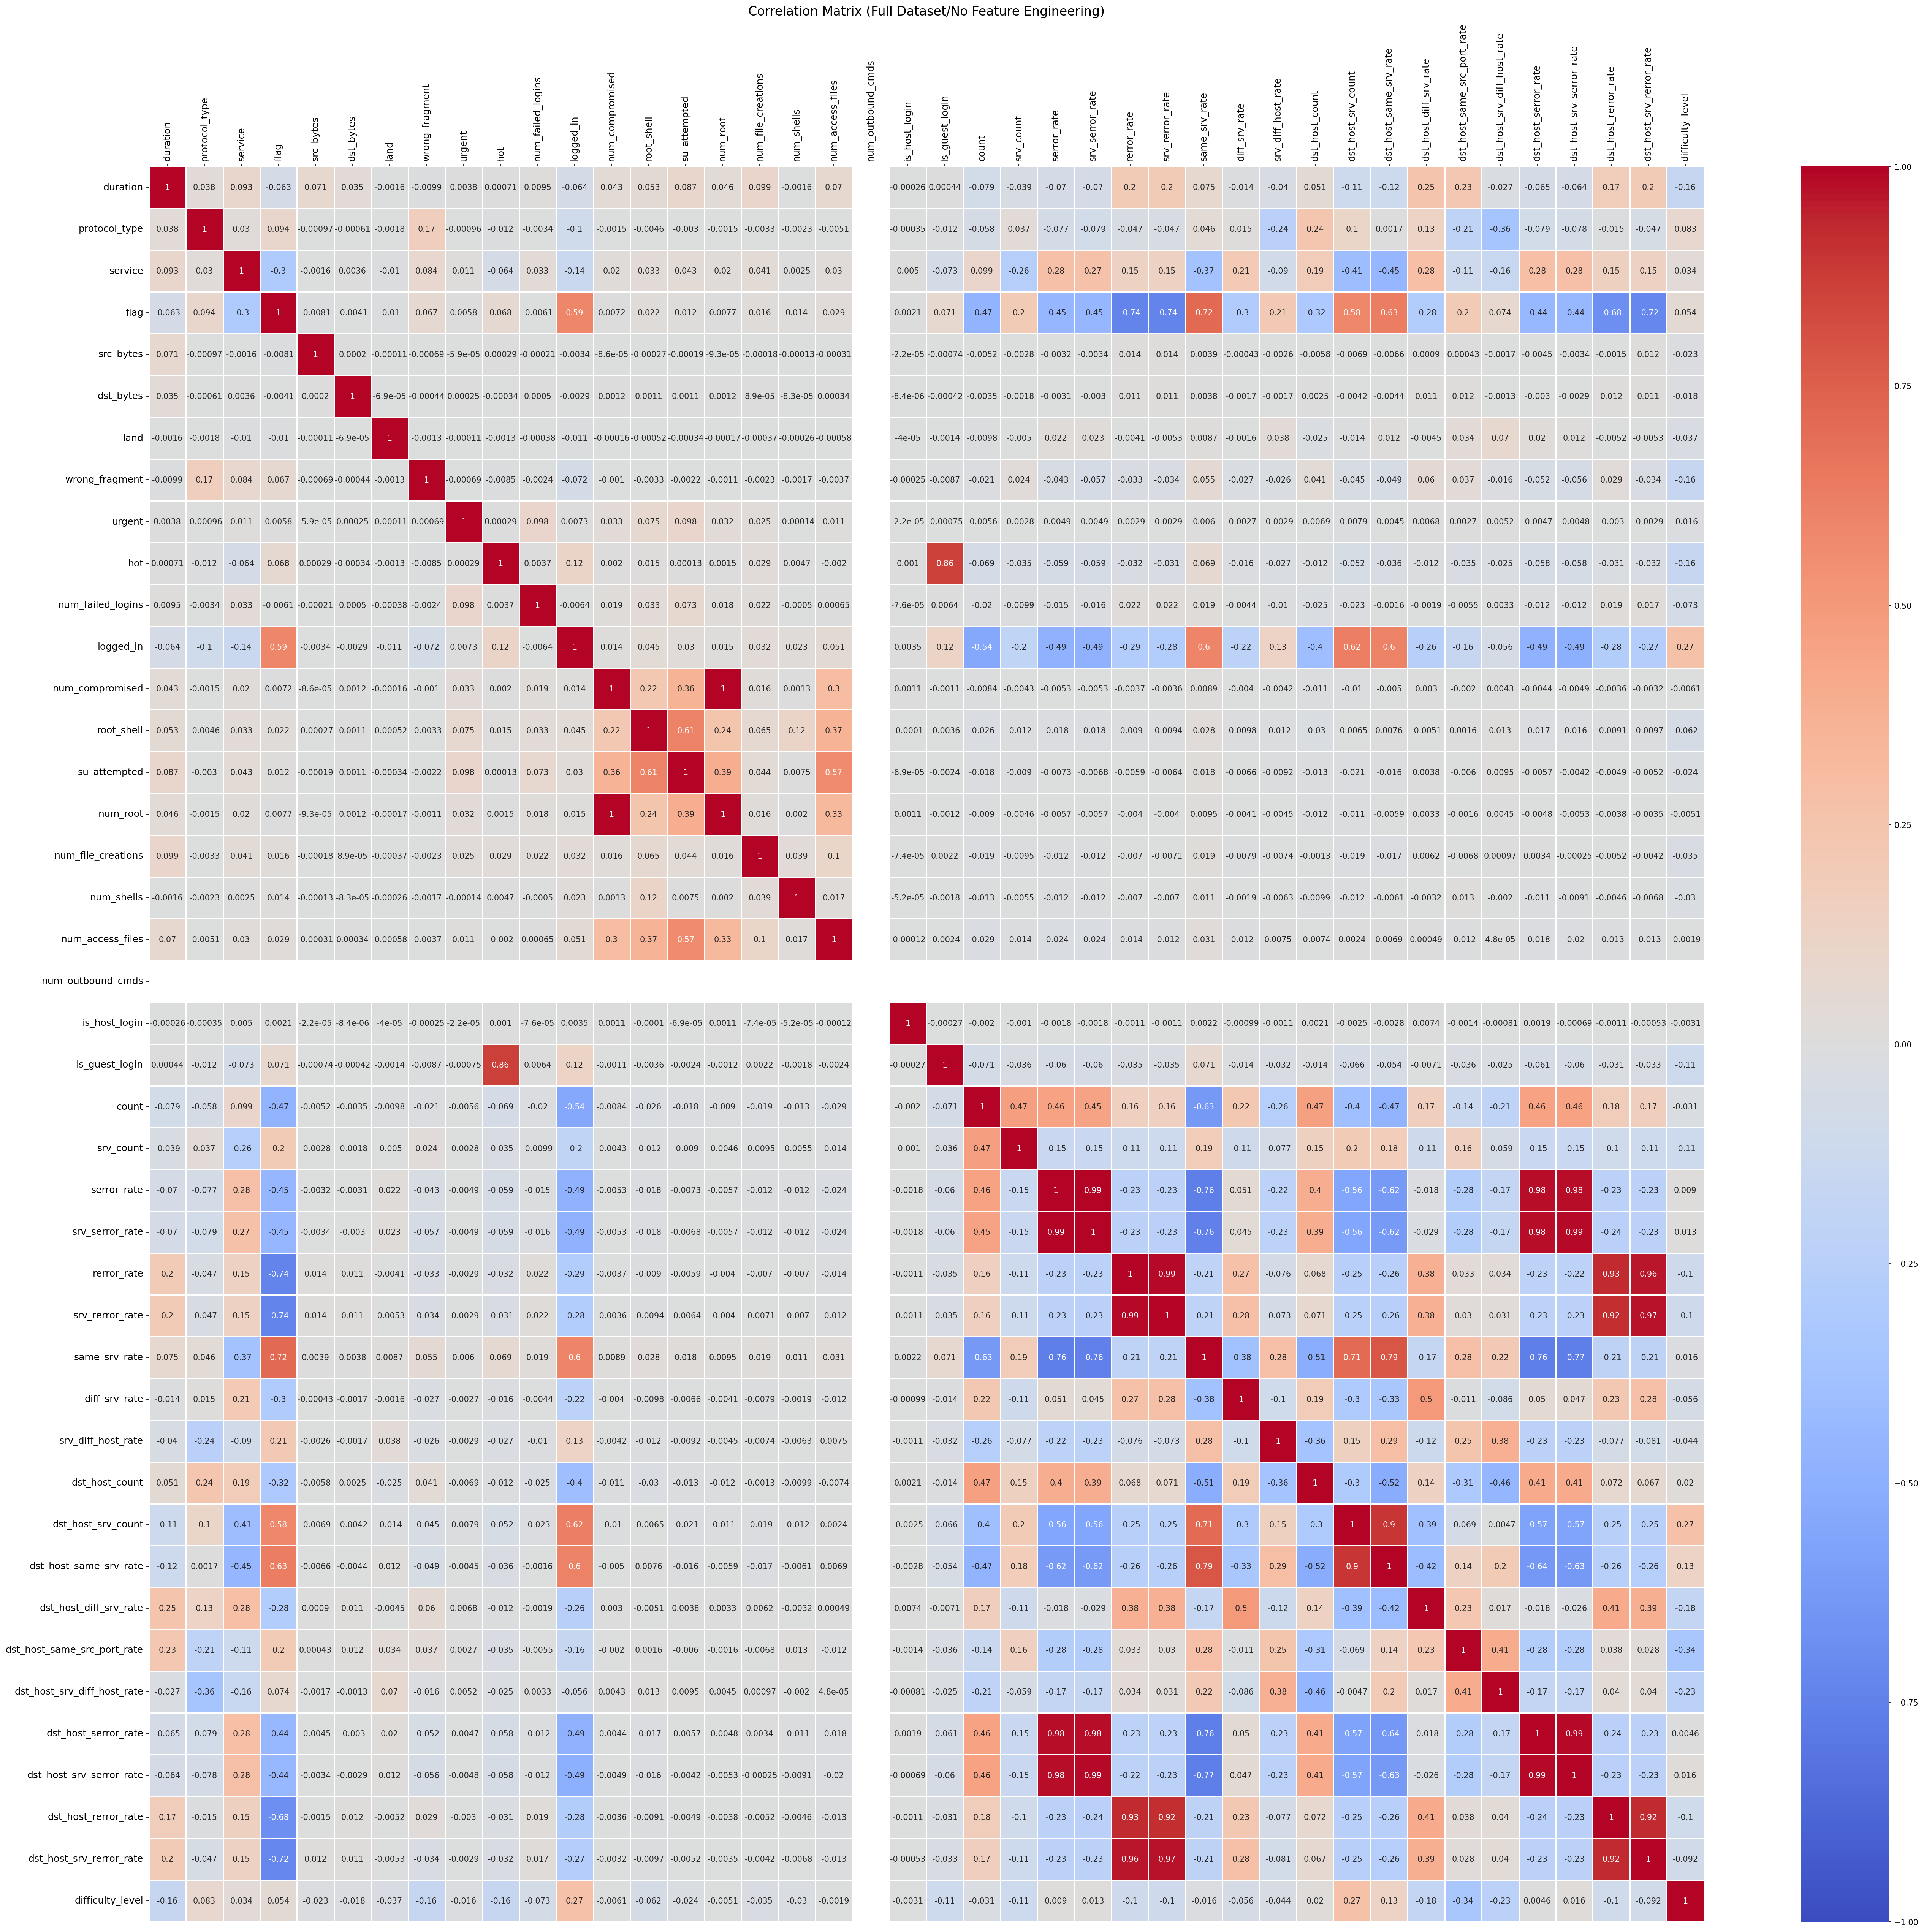

In [11]:
# correlation Matrix before feature engineering
# runtime warning is expected
plt.figure(figsize=(44, 40), dpi=150)
ax = sns.heatmap(
    train_data.drop(
        columns=["attack_type", "attack_category", "attack_status", "attack_category_encoded"], errors="ignore"
    ).corr(), cmap='coolwarm', annot=True, linewidths=0.5, vmin=-1, vmax=1
)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.title("Correlation Matrix (Full Dataset/No Feature Engineering)", fontsize=16, pad=10)
plt.show()


In [12]:
# keep a copy of the original dataset for tree-based models
train_data_full = train_data.copy()
test_data_full = test_data.copy()

# create a separate dataset for feature selection
train_data_reduced = train_data.copy()
test_data_reduced = test_data.copy()

text_cols = ["attack_type", "attack_category", "attack_status"]
train_data_reduced.drop(columns=text_cols, inplace=True, errors='ignore')
test_data_reduced.drop(columns=text_cols, inplace=True, errors='ignore')

# --- 1: Variance Threshold/Constant Features ---
print_section("Low Variance Features / Constant Features")
var_thresh = VarianceThreshold(threshold=0.01)
var_thresh.fit(train_data_reduced.drop(columns=["attack_category_encoded"]))
low_variance_features = train_data_reduced.drop(columns=['attack_category_encoded']).columns[
    var_thresh.get_support(False) == False
].tolist()

print(f"features to drop due to low variance/constant: {low_variance_features}")

# drop them
train_data_reduced.drop(columns=low_variance_features, inplace=True)
test_data_reduced.drop(columns=low_variance_features, inplace=True, errors='ignore')

# --- 2: Correlation Threshold ---
print_section("Correlated Features")
reduced_corr_matrix = train_data_reduced.drop(columns=['attack_category_encoded']).corr()
correlation_threshold = 0.70
correlated_features = set()

cols = reduced_corr_matrix.columns
for i in range(len(cols)):
    for j in range(i):
        if abs(reduced_corr_matrix.iloc[i, j]) > correlation_threshold:
            correlated_features.add(cols[i])

print(f"features to drop due to high correlation (> {correlation_threshold}): {correlated_features}")

# drop them
train_data_reduced.drop(columns=list(correlated_features), inplace=True, errors='ignore')
test_data_reduced.drop(columns=list(correlated_features), inplace=True, errors='ignore')

# --- 3: Variance Inflation Factor (VIF) ---
print_section("Variance Inflation Factor")
numeric_cols = [c for c in train_data_reduced.columns if c != 'attack_category_encoded']
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_cols
vif_data["VIF"] = [
    variance_inflation_factor(train_data_reduced[numeric_cols].values, idx)
    for idx in range(len(numeric_cols))
]

vif_threshold = 10
vif_features_to_drop = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].tolist()
print(f"features to drop due to VIF > {vif_threshold}: {vif_features_to_drop}")

# drop them
train_data_reduced.drop(columns=vif_features_to_drop, inplace=True, errors='ignore')
test_data_reduced.drop(columns=vif_features_to_drop, inplace=True, errors='ignore')

print_section("Feature Selection Complete (Reduced Dataset)")
print("train_data_reduced shape:", train_data_reduced.shape)
print("test_data_reduced shape: ", test_data_reduced.shape)
print("train_data_full shape:   ", train_data_full.shape)
print("test_data_full shape:    ", test_data_full.shape)



################################################################################
                   Low Variance Features / Constant Features                    
################################################################################

features to drop due to low variance/constant: ['land', 'urgent', 'num_failed_logins', 'root_shell', 'su_attempted', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']

################################################################################
                              Correlated Features                               
################################################################################

features to drop due to high correlation (> 0.7): {'num_root', 'dst_host_same_srv_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_serror_rate', 'same_srv_rate', 'dst_host_srv_serror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'srv_serror_rate', 'dst_host_srv_count'}

#################

### Correlation Matrix Analysis
Now that we have optimized our dataset, we generate a correlation matrix to analyze feature relationships and potential influences on classification. Meanwhile, train_data_full remains unchanged.


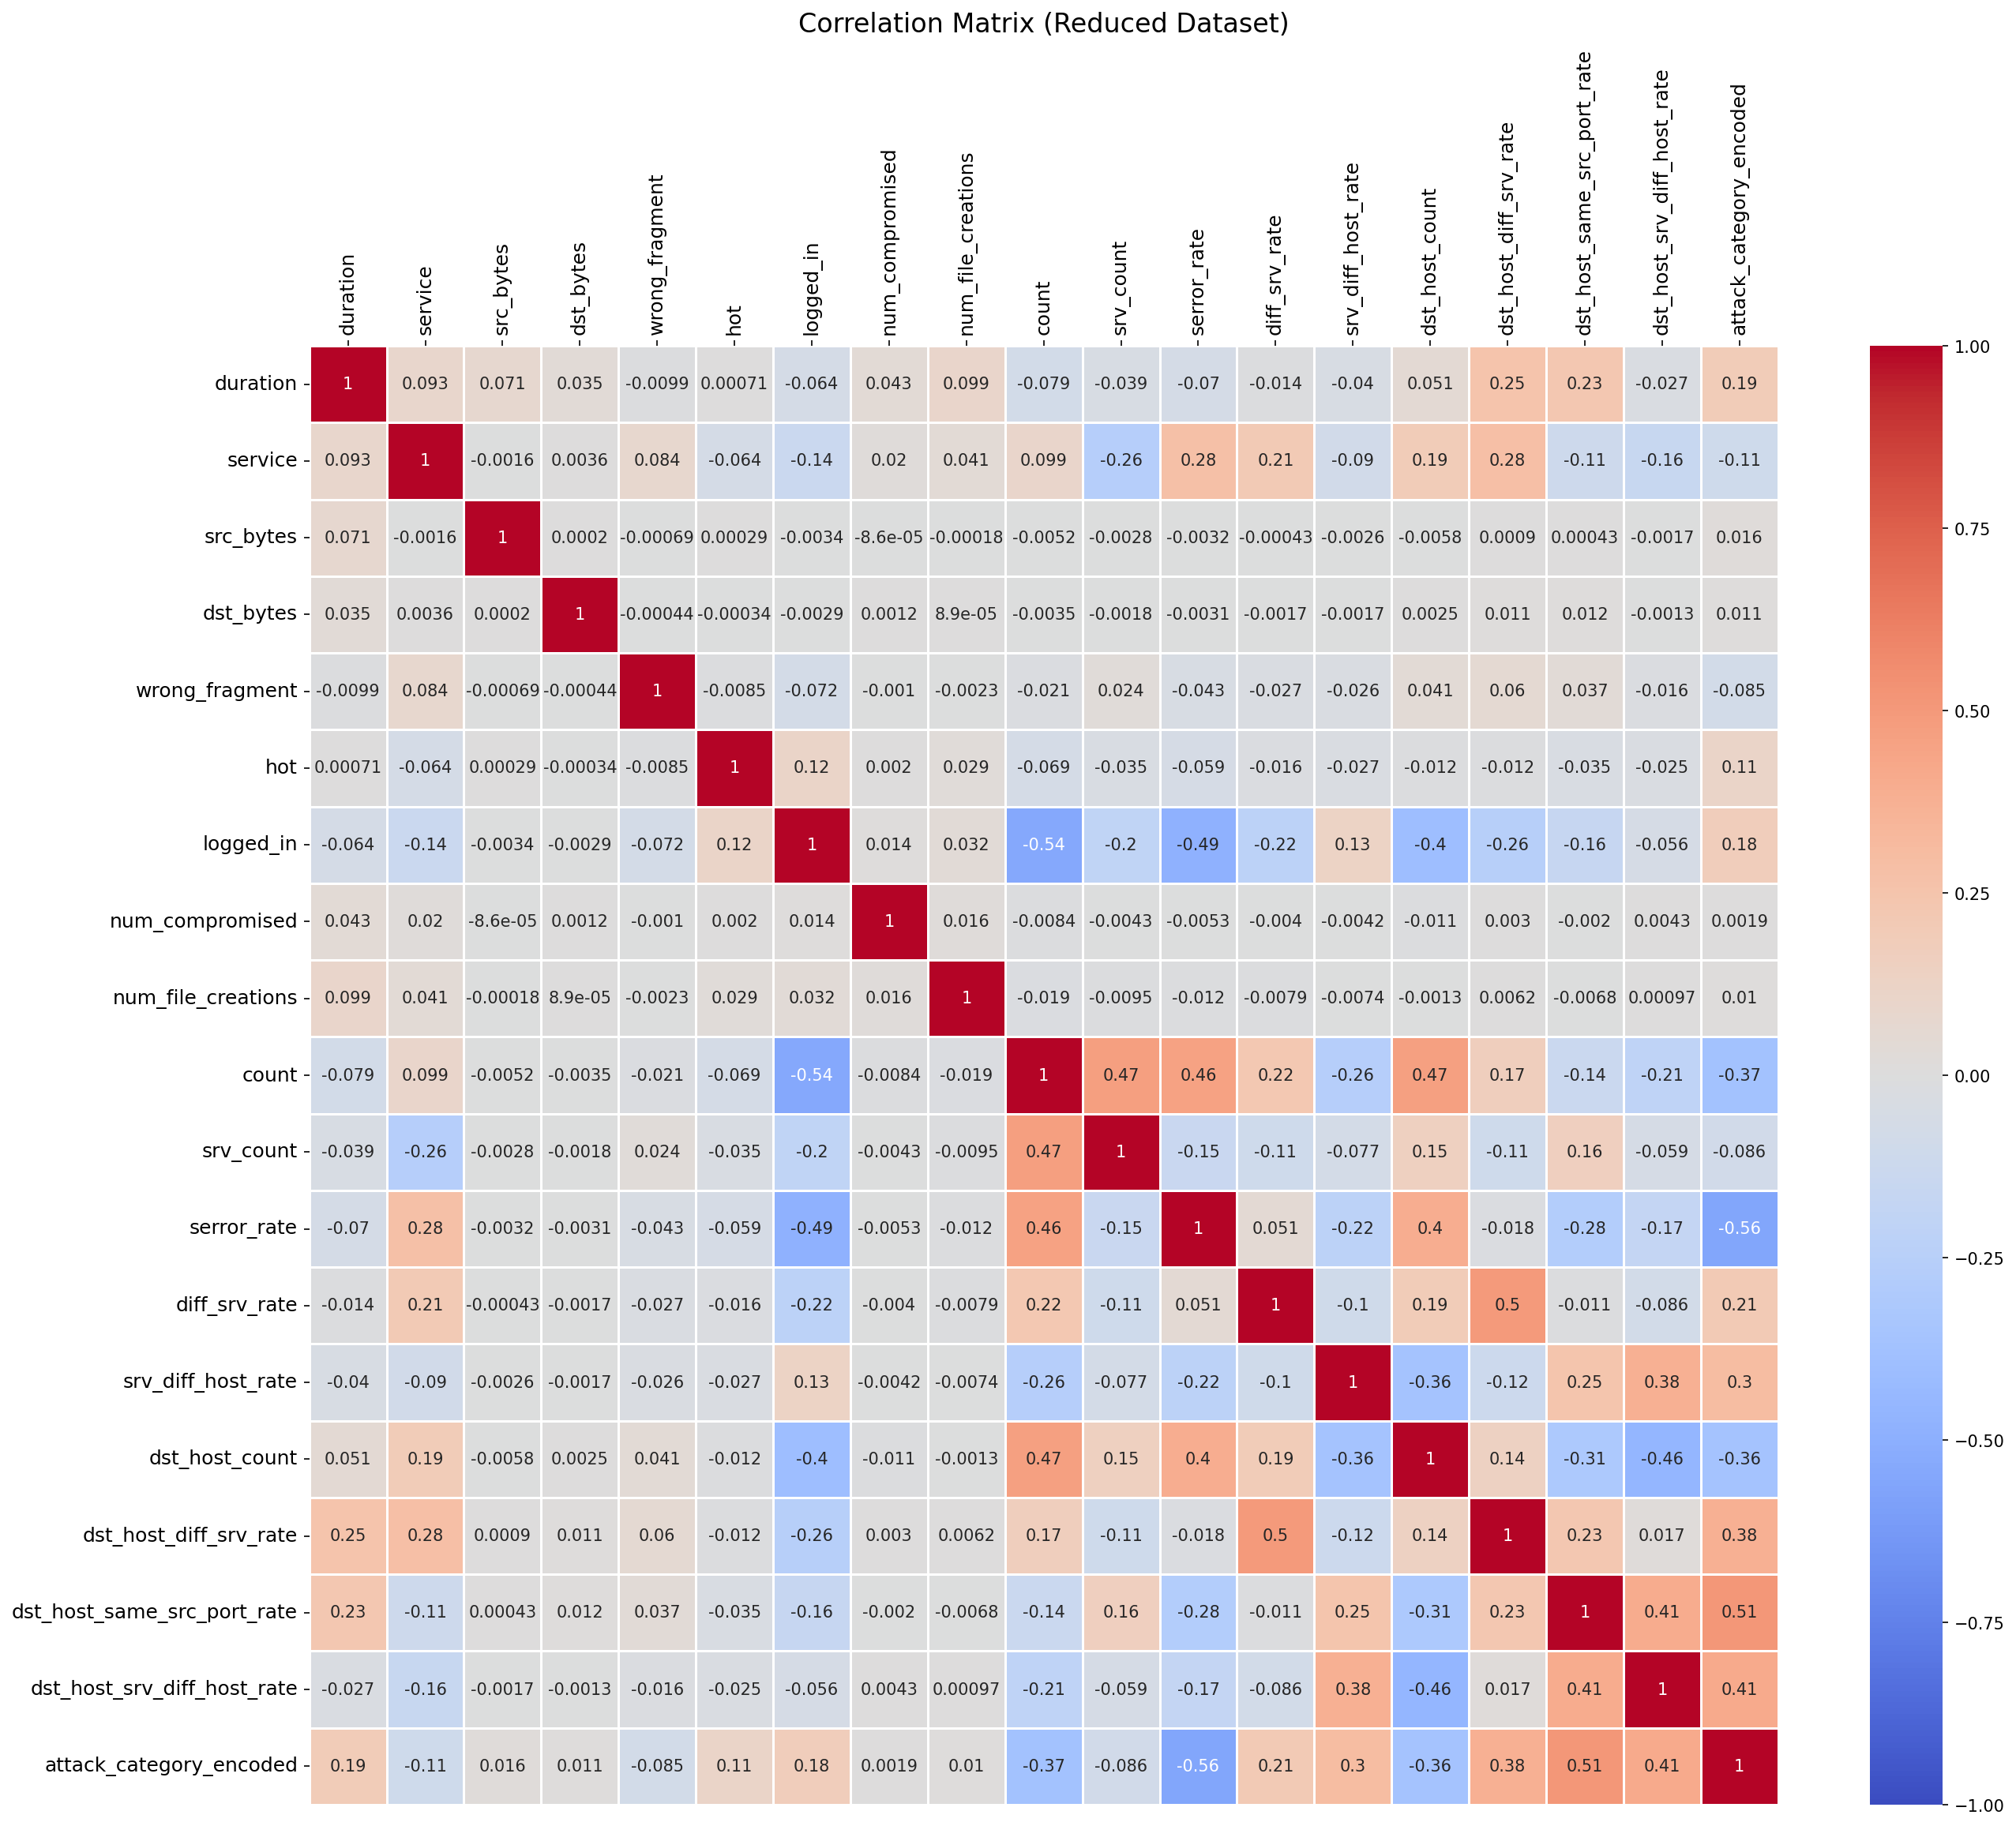

In [13]:
plt.figure(figsize=(20, 16), dpi=150)
ax = sns.heatmap(train_data_reduced.corr(), cmap='coolwarm', annot=True, linewidths=0.5, vmin=-1, vmax=1)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.title("Correlation Matrix (Reduced Dataset)", fontsize=16, pad=10)
plt.show()


## Model Training & Evaluation
Here we demonstrate two sets of models:
- Tree-based (RandomForest, HistGradientBoostingClassifier) on `train_data_full`
- Linear-based (LogisticRegression) on `train_data_reduced`

We already have separate train/test sets, but let's ensure we separate features (X) from target (y).

Some attack types had very few samples, making it hard for the model to learn their patterns. Therefore, we will be using `SMOTE` to create synthetic examples for underrepresented classes, so the model now has enough data to recognize those attacks.


In [14]:
train_data_full

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              1       20     9        491          0     0   
1              0              2       44     9        146          0     0   
2              0              1       49     5          0          0     0   
3              0              1       24     9        232       8153     0   
4              0              1       24     9        199        420     0   
...          ...            ...      ...   ...        ...        ...   ...   
125968         0              1       49     5          0          0     0   
125969         8              2       49     9        105        145     0   
125970         0              1       54     9       2231        384     0   
125971         0              1       30     5          0          0     0   
125972         0              1       20     9        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_diff_host_rate  \
0                    0       0    0  ...                         0.00   
1                    0       0    0  ...                         0.00   
2                    0       0    0  ...                         0.00   
3                    0       0    0  ...                         0.04   
4                    0       0    0  ...                         0.00   
...                ...     ...  ...  ...                          ...   
125968               0       0    0  ...                         0.00   
125969               0       0    0  ...                         0.00   
125970               0       0    0  ...                         0.00   
125971               0       0    0  ...                         0.00   
125972               0       0    0  ...                         0.00   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                  0.05   
1                       0.00                      0.00                  0.00   
2                       1.00                      1.00                  0.00   
3                       0.03                      0.01                  0.00   
4                       0.00                      0.00                  0.00   
...                      ...                       ...                   ...   
125968                  1.00                      1.00                  0.00   
125969                  0.00                      0.00                  0.00   
125970                  0.72                      0.00                  0.01   
125971                  1.00                      1.00                  0.00   
125972                  0.00                      0.00                  0.00   

        dst_host_srv_rerror_rate  attack_type  difficulty_level  \
0                           0.00       normal                20   
1                           0.00       normal                15   
2                           0.00      neptune                19   
3                           0.01       normal                21   
4                           0.00       normal                21   
...                          ...          ...               ...   
125968                      0.00      neptune                20   
125969                      0.00       normal                21   
125970                      0.00       normal                18   
125971                      0.00      neptune                20   
125972                      0.00       normal                21   

        attack_category  attack_status  attack_category_encoded  
0                Normal         normal                        1  
1                Normal         normal                        1  
2                   DoS         attack                        0  
3                Normal         normal                        1  
4                Normal         normal                        1  
...                 ...         

In [15]:
test_data_full

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              1       49     1          0          0     0   
1             0              1       49     1          0          0     0   
2             2              1       20     9      12983          0     0   
3             0              0       14     9         20          0     0   
4             1              1       60     2          0         15     0   
...         ...            ...      ...   ...        ...        ...   ...   
22539         0              1       54     9        794        333     0   
22540         0              1       24     9        317        938     0   
22541         0              1       24     9      54540       8314     0   
22542         0              2       12     9         42         42     0   
22543         0              1       57     1          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_same_src_port_rate  \
0                   0       0    0  ...                         0.00   
1                   0       0    0  ...                         0.00   
2                   0       0    0  ...                         0.61   
3                   0       0    0  ...                         1.00   
4                   0       0    0  ...                         0.03   
...               ...     ...  ...  ...                          ...   
22539               0       0    0  ...                         0.01   
22540               0       0    0  ...                         0.01   
22541               0       0    2  ...                         0.00   
22542               0       0    0  ...                         0.00   
22543               0       0    0  ...                         0.00   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                             0.00                  0.00   
1                             0.00                  0.00   
2                             0.02                  0.00   
3                             0.28                  0.00   
4                             0.02                  0.00   
...                            ...                   ...   
22539                         0.01                  0.01   
22540                         0.01                  0.01   
22541                         0.00                  0.00   
22542                         0.00                  0.00   
22543                         0.00                  0.00   

       dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.0                  1.00   
1                           0.0                  1.00   
2                           0.0                  0.00   
3                           0.0                  0.00   
4                           0.0                  0.83   
...                         ...                   ...   
22539                       0.0                  0.00   
22540                       0.0                  0.00   
22541                       0.0                  0.07   
22542                       0.0                  0.00   
22543                       0.0                  0.44   

       dst_host_srv_rerror_rate  attack_type  difficulty_level  \
0                          1.00      neptune                21   
1                          1.00      neptune                21   
2                          0.00       normal                21   
3                          0.00        saint                15   
4                          0.71        mscan                11   
...                         ...          ...               ...   
22539                      0.00       normal                21   
22540                      0.00       normal                21   
22541                      0.07         back                15   
22542                      0.00       normal                21   
22543                      1.00        mscan                14   

       attack_cate

In [16]:
train_data_reduced

duration  service  src_bytes  dst_bytes  wrong_fragment  hot  \
0              0       20        491          0               0    0   
1              0       44        146          0               0    0   
2              0       49          0          0               0    0   
3              0       24        232       8153               0    0   
4              0       24        199        420               0    0   
...          ...      ...        ...        ...             ...  ...   
125968         0       49          0          0               0    0   
125969         8       49        105        145               0    0   
125970         0       54       2231        384               0    0   
125971         0       30          0          0               0    0   
125972         0       20        151          0               0    0   

        logged_in  num_compromised  num_file_creations  count  srv_count  \
0               0                0                   0      2          2   
1               0                0                   0     13          1   
2               0                0                   0    123          6   
3               1                0                   0      5          5   
4               1                0                   0     30         32   
...           ...              ...                 ...    ...        ...   
125968          0                0                   0    184         25   
125969          0                0                   0      2          2   
125970          1                0                   0      1          1   
125971          0                0                   0    144          8   
125972          1                0                   0      1          1   

        serror_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0               0.0           0.00                0.00             150   
1               0.0           0.15                0.00             255   
2               1.0           0.07                0.00             255   
3               0.2           0.00                0.00              30   
4               0.0           0.00                0.09             255   
...             ...            ...                 ...             ...   
125968          1.0           0.06                0.00             255   
125969          0.0           0.00                0.00             255   
125970          0.0           0.00                0.00             255   
125971          1.0           0.05                0.00             255   
125972          0.0           0.00                0.00             255   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                         0.03                         0.17   
1                         0.60                         0.88   
2                         0.05                         0.00   
3                         0.00                         0.03   
4                         0.00                         0.00   
...                        ...                          ...   
125968                    0.06                         0.00   
125969                    0.01                         0.01   
125970                    0.06                         0.00   
125971                    0.05                         0.00   
125972                    0.03                         0.30   

        dst_host_srv_diff_host_rate  attack_category_encoded  
0                              0.00                        1  
1                              0.00                        1  
2                              0.00                        0  
3                              0.04                        1  
4                              0.00                        1  
...                             ...                      ...  
125968                         0.00                        0  
125969                         0.00                        1  
125970           

In [17]:
test_data_reduced

duration  service  src_bytes  dst_bytes  wrong_fragment  hot  \
0             0       49          0          0               0    0   
1             0       49          0          0               0    0   
2             2       20      12983          0               0    0   
3             0       14         20          0               0    0   
4             1       60          0         15               0    0   
...         ...      ...        ...        ...             ...  ...   
22539         0       54        794        333               0    0   
22540         0       24        317        938               0    0   
22541         0       24      54540       8314               0    2   
22542         0       12         42         42               0    0   
22543         0       57          0          0               0    0   

       logged_in  num_compromised  num_file_creations  count  srv_count  \
0              0                0                   0    229         10   
1              0                0                   0    136          1   
2              0                0                   0      1          1   
3              0                0                   0      1         65   
4              0                0                   0      1          8   
...          ...              ...                 ...    ...        ...   
22539          1                0                   0      1          1   
22540          1                0                   0      2         11   
22541          1                1                   0      5         10   
22542          0                0                   0      4          6   
22543          0                0                   0      4         10   

       serror_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0              0.0           0.06                0.00             255   
1              0.0           0.06                0.00             255   
2              0.0           0.00                0.00             134   
3              0.0           0.00                1.00               3   
4              0.0           0.00                0.75              29   
...            ...            ...                 ...             ...   
22539          0.0           0.00                0.00             100   
22540          0.0           0.00                0.18             197   
22541          0.0           0.00                0.20             255   
22542          0.0           0.00                0.33             255   
22543          0.0           1.00                1.00             255   

       dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                        0.06                         0.00   
1                        0.06                         0.00   
2                        0.04                         0.61   
3                        0.00                         1.00   
4                        0.17                         0.03   
...                       ...                          ...   
22539                    0.06                         0.01   
22540                    0.00                         0.01   
22541                    0.00                         0.00   
22542                    0.01                         0.00   
22543                    0.03                         0.00   

       dst_host_srv_diff_host_rate  attack_category_encoded  
0                             0.00                        0  
1                             0.00                        0  
2                             0.02                        1  
3                             0.28                        3  
4                             0.02                        3  
...                            ...                      ...  
22539                         0.01                        1  
22540                         0.01                        1  
22541                         0.00                        0  
22542      

In [18]:
# --- 1: preparing Data for Tree-Based Models ---
X_full_train = train_data_full.drop(columns=["attack_type", "attack_category", "attack_status", "attack_category_encoded"], errors="ignore")
y_full_train = train_data_full["attack_category_encoded"]

X_full_test = test_data_full.drop(columns=["attack_type", "attack_category", "attack_category_encoded"], errors="ignore")
y_full_test = test_data_full["attack_category_encoded"]

# --- 2: Preparing Data for Linear Models ---
X_reduced_train = train_data_reduced.drop(columns=["attack_category_encoded"], errors="ignore")
y_reduced_train = train_data_reduced["attack_category_encoded"]

X_reduced_test = test_data_reduced.drop(columns=["attack_category_encoded"], errors="ignore")
y_reduced_test = test_data_reduced["attack_category_encoded"]

# --- 3: apply SMOTE to balance dataset before training all models ---
print_section("After applying SMOTE to balance dataset")
smote = SMOTE(random_state=42)
X_full_train_resampled, y_full_train_resampled = smote.fit_resample(X_full_train, y_full_train)
X_reduced_train_resampled, y_reduced_train_resampled = smote.fit_resample(X_reduced_train, y_reduced_train)
print(Counter(y_full_train_resampled))
print(Counter(y_reduced_train_resampled))



################################################################################
                    After applying SMOTE to balance dataset                     
################################################################################

Counter({1: 67343, 0: 67343, 4: 67343, 3: 67343, 5: 67343})
Counter({1: 67343, 0: 67343, 4: 67343, 3: 67343, 5: 67343})



################################################################################
                        Training RandomForestClassifier                         
################################################################################

Accuracy: 0.7816
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      7458
           1       0.70      0.97      0.82      9711
           2       1.00      0.00      0.00         2
           3       0.75      0.80      0.77      2421
           4       0.93      0.16      0.28      2885
           5       0.35      0.36      0.36        67

    accuracy                           0.78     22544
   macro avg       0.78      0.51      0.51     22544
weighted avg       0.82      0.78      0.75     22544



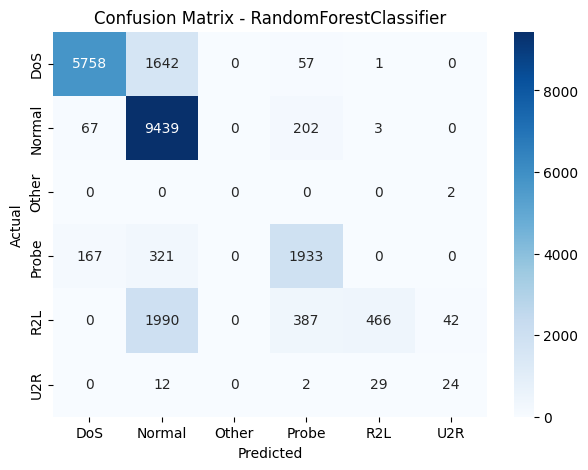


################################################################################
                    Training HistGradientBoostingClassifier                     
################################################################################

Accuracy: 0.8111
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      7458
           1       0.75      0.97      0.85      9711
           2       1.00      0.00      0.00         2
           3       0.73      0.76      0.74      2421
           4       0.96      0.28      0.44      2885
           5       0.18      0.43      0.25        67

    accuracy                           0.81     22544
   macro avg       0.76      0.55      0.53     22544
weighted avg       0.84      0.81      0.80     22544



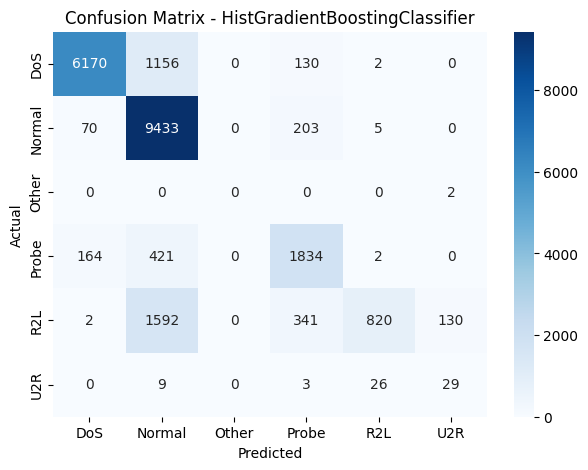


################################################################################
                          Training LogisticRegression                           
################################################################################

Accuracy: 0.7005
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      7458
           1       0.67      0.85      0.75      9711
           2       1.00      0.00      0.00         2
           3       0.67      0.76      0.71      2421
           4       0.39      0.06      0.10      2885
           5       0.04      0.58      0.08        67

    accuracy                           0.70     22544
   macro avg       0.61      0.50      0.41     22544
weighted avg       0.71      0.70      0.68     22544



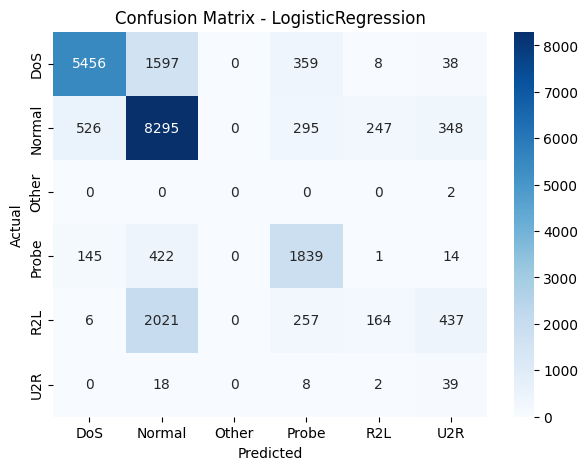

In [19]:
# helper preprocessing function for models that require scaling
def scale_data_set(X_train, X_test):
    scaler = StandardScaler()
    return scaler.fit_transform(X_train), scaler.transform(X_test)

# model config keys
RANDOM_FOREST_CLASSIFIER = "RandomForestClassifier"
HIST_GRADIENT_BOOSTING_CLASSIFIER = "HistGradientBoostingClassifier"
LOGISTIC_REGRESSION = "LogisticRegression"
ESTIMATOR = "estimator"
DATASET = "dataset"
PRE_PROCESSOR = "preprocessor"
FULL = "full"
REDUCED = "reduced"

# configuration dictionary mapping each model name to its estimator, dataset type, 
# and (optionally) a preprocessor function
model_configs = {
    RANDOM_FOREST_CLASSIFIER: {
         ESTIMATOR: RandomForestClassifier(min_samples_split=10, random_state=42),
         DATASET: FULL
    },
    HIST_GRADIENT_BOOSTING_CLASSIFIER: {
         ESTIMATOR: HistGradientBoostingClassifier(max_iter=200, learning_rate=0.1, random_state=42),
         DATASET: FULL
    },
    LOGISTIC_REGRESSION: {
         ESTIMATOR: LogisticRegression(max_iter=2000, solver="newton-cg", random_state=42),
         DATASET: REDUCED,
         PRE_PROCESSOR: scale_data_set
    }
}

# dataset keys
X_TRAIN = "X_train"
Y_TRAIN = "y_train"
X_TEST = "X_test"
Y_TEST = "y_test"

# mapping of dataset types to their corresponding train and test sets
dataset_mapping = {
    FULL: {
        X_TRAIN: X_full_train_resampled,
        Y_TRAIN: y_full_train_resampled,
        X_TEST: X_full_test,
        Y_TEST: y_full_test
    },
    REDUCED: {
        X_TRAIN: X_reduced_train_resampled,
        Y_TRAIN: y_reduced_train_resampled,
        X_TEST: X_reduced_test,
        Y_TEST: y_reduced_test
    }
}

# labels for each class
class_labels = attack_category_encoder.classes_

# train & evaluate
for model_name, config in model_configs.items():
    print_section(f"Training {model_name}")
    
    # get the dataset based on the config
    dataset_type = config[DATASET]
    data = dataset_mapping[dataset_type]
    X_train, y_train = data[X_TRAIN], data[Y_TRAIN]
    X_test, y_test = data[X_TEST], data[Y_TEST]
    
    # apply a model-specific preprocessor if provided
    if PRE_PROCESSOR in config:
        X_train, X_test = config[PRE_PROCESSOR](X_train, X_test)
    
    # fit and evaluate the model
    model = config[ESTIMATOR]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

    # plot Confusion Matrix with Labels
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5), dpi=100)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


## Conclusion
This project focused on network intrusion detection using the NSL-KDD dataset. We built and evaluated multiple machine learning models, applying feature selection, data balancing, and performance evaluation techniques to improve detection accuracy.

Key Takeaways:
- `HistGradientBoostingClassifier` performed best (**81.11% accuracy**), making it the top choice for intrusion detection.
- `RandomForestClassifier` achieved **78.16% accuracy**, showing strong results but slightly lower recall.
- `LogisticRegression` performed better than expected (**70.05%**), thanks to feature selection and scaling.
- `SMOTE` significantly improved recall for rare attack classes, ensuring better detection of underrepresented threats.
- Confusion matrices revealed misclassification patterns, highlighting the need for further improvements.

Future Work:
- Address repeated variables, and column drops, and improve Python code. 
- Try XGBoost or LightGBM to boost model accuracy and recall.
- Explore faster SVM variants (LinearSVC, ThunderSVM) for large-scale deployment.
- Feature engineering to refine input data.
- Deploy the best model in a real-time intrusion detection system (IDS).

This pipeline lays a strong foundation for real-world network security applications, with room for further optimization!
